# Concrete Strength Prediction - Regression Model

Importing necessary Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential 
from keras.layers import Dense

Importing the dataset

In [2]:
data = pd.read_csv('concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Checking for missing values

In [4]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Definining predictors and target variable

In [5]:
predictors = data.drop(['Strength'],axis = 'columns')
target = data['Strength']

In [6]:
cols = predictors.shape[1]
cols

8

# Part A

In [7]:
def regression_model():
    model = Sequential()
    model.add(Dense(10,activation = 'relu',input_shape = (cols,)))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [8]:
model = regression_model()

In [9]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(predictors, target, test_size = 0.3,shuffle = True)

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error_A = []
for i in range(0,50):
    model.fit(x_train, y_train, epochs = 50,verbose = 0)
    y_predicted = model.predict(x_test)
    error = mean_squared_error(y_predicted,y_test)
    mean_squared_error_A.append(error)

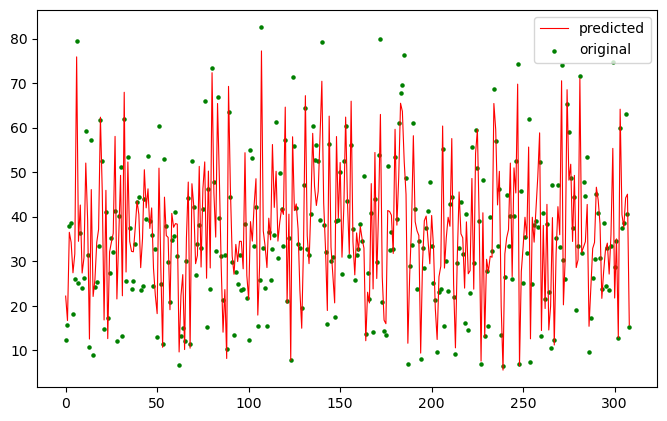

In [12]:
x_axis = range(len(y_predicted))
plt.figure(figsize = (8,5),dpi = 100)
plt.scatter(x_axis, y_test, s=5, color="green", label="original")
plt.plot(x_axis, y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [13]:
len(mean_squared_error_A)

50

In [14]:
mean_A = np.mean(mean_squared_error_A) #sum(mean_square_error)/len(mean_square_error)
mean_A

61.29937669855814

In [15]:
std_A = np.std(mean_squared_error_A)
std_A

11.606171312531735

# Part B

Using Normalised datset for the model

In [16]:
scaled_predictors = (predictors - predictors.mean())/predictors.std()

In [17]:
def regression_model():
    model = Sequential()
    model.add(Dense(10,activation = 'relu',input_shape = (cols,)))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [18]:
model = regression_model()

In [19]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(scaled_predictors, target, test_size = 0.3)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error_B = []
for i in range(0,50):
    model.fit(x_train, y_train, epochs = 50,verbose = 0)
    y_predicted = model.predict(x_test)
    error = mean_squared_error(y_predicted,y_test)
    mean_squared_error_B.append(error)

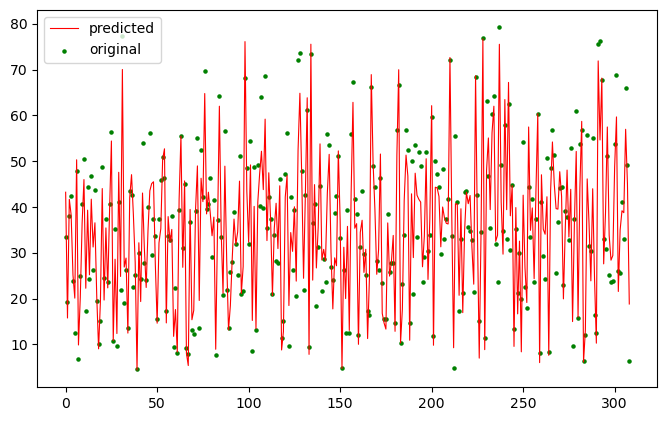

In [22]:
x_axis = range(len(y_predicted))
plt.figure(figsize = (8,5),dpi = 100)
plt.scatter(x_axis, y_test, s=5, color="green", label="original")
plt.plot(x_axis, y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [23]:
len(mean_squared_error_B)

50

In [24]:
mean_B = np.mean(mean_squared_error_B)
mean_B

51.743049919140574

In [25]:
std_B = np.std(mean_squared_error_B)
std_B

61.360942454720444

In [26]:
mean_A,mean_B

(61.29937669855814, 51.743049919140574)

By comapring mean of part A and Part B i.e mean_A and mean_B, we can see that the mean of mean sqaured error of model build on normalised dataset is less than the model build without normalising the dataset

# Part C

Using Normalised dataset for model, epoch = 100

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error_C = []
for i in range(0,50):
    model.fit(x_train, y_train, epochs = 100,verbose = 0)
    y_predicted = model.predict(x_test)
    error = mean_squared_error(y_predicted,y_test)
    mean_squared_error_C.append(error)

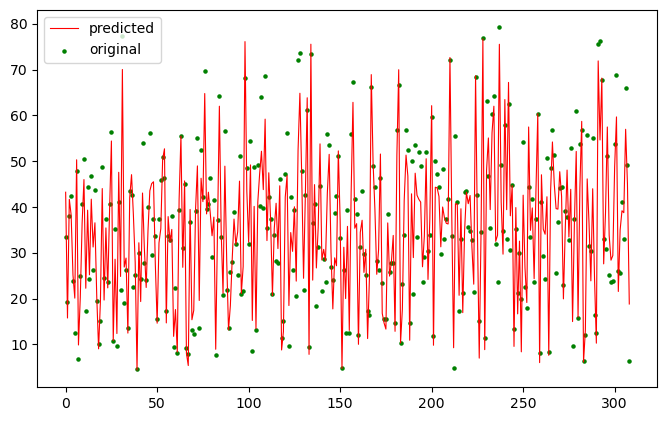

In [28]:
x_axis = range(len(y_predicted))
plt.figure(figsize = (8,5),dpi = 100)
plt.scatter(x_axis, y_test, s=5, color="green", label="original")
plt.plot(x_axis, y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [29]:
len(mean_squared_error_C)

50

In [30]:
mean_C = np.mean(mean_squared_error_C)
mean_C

36.064244770096195

In [31]:
std_C = np.mean(mean_squared_error_C)
std_C

36.064244770096195

In [32]:
mean_B,mean_C

(51.743049919140574, 36.064244770096195)

By comparing the the mean of mean squared error of part B where normalised data was used with epoch = 50 and part C where normalised data was used with epoch = 100.

The mean of mean squared error for part C is less than that for part B

# Part D

Using normalised version of dataset,

building neural network model with 3 hidden layers with 10 nodes each and 

relu as activation function

In [36]:
scaled_predictors.shape

(1030, 8)

In [39]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten

In [40]:
def regression_neural_network():
    model = Sequential()
    model.add(Conv1D(32, 2, activation="relu", input_shape=(8, 1)))
    model.add(Flatten())
    
    #three hidden layer with relu activation function
    model.add(Dense(10,activation = 'relu',input_shape = (cols,)))
    model.add(Dense(10,activation = 'relu',input_shape = (cols,)))
    model.add(Dense(10,activation = 'relu',input_shape = (cols,)))
    
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error_D = []
for i in range(0,50):
    model.fit(x_train, y_train, epochs = 100,verbose = 0)
    y_predicted = model.predict(x_test)
    error = mean_squared_error(y_predicted,y_test)
    mean_squared_error_D.append(error)

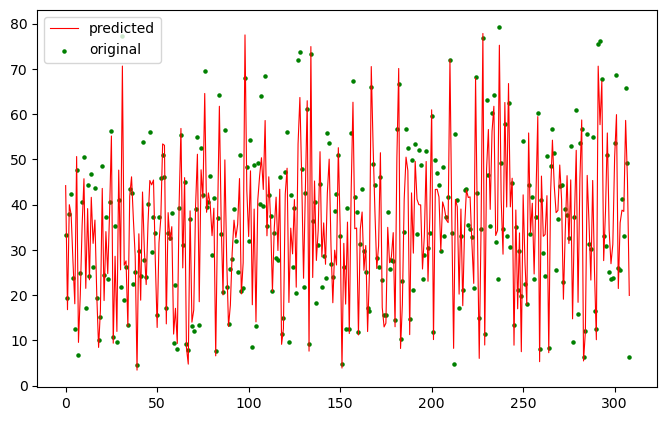

In [42]:
x_axis = range(len(y_predicted))
plt.figure(figsize = (8,5),dpi = 100)
plt.scatter(x_axis, y_test, s=5, color="green", label="original")
plt.plot(x_axis, y_predicted, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [43]:
len(mean_squared_error_D)

50

In [44]:
mean_D = np.mean(mean_squared_error_D)
mean_D

35.731324606019605

In [46]:
std_D = np.std(mean_squared_error_D)
std_D

0.1969798659288582

In [47]:
mean_B, mean_D

(51.743049919140574, 35.731324606019605)

By comparing the the mean of mean squared error of part B where normalised data was used with epoch = 50 and part C where we used neural network with 3 hidden layers

The mean of mean squared error for part D is less than that for part B